<a href="https://colab.research.google.com/github/dayviddouglas/arvore_decisao_diabetes/blob/main/Arvore_de_decisao_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

<h3> Lendo o dataframe <h3/>




In [83]:
df= pd.read_csv('/content/diabetes_dataset00.csv')

<h3> Selecionando os tipos de diabetes para estudo: tipo1, tipo2 e tipo 3. <h3/>

In [84]:
diabetes_tipo_1=df.loc[df['Target']== "Type 1 Diabetes"]
diabetes_tipo_2=df.loc[df['Target']== "Type 2 Diabetes"]
diabetes_tipo_3=df.loc[df['Target']== "Type 3c Diabetes (Pancreatogenic Diabetes)"]


<h3> Criando uma cópia do dataset de origem. <h3/>

In [85]:
tipos_diabetes=df.copy()

<h3>Filtrando os registros das diabetes do tipo 1, 2 e 3.<h3/>


In [86]:
tipos_diabetes = tipos_diabetes[tipos_diabetes['Target'].isin(["Type 1 Diabetes", "Type 2 Diabetes", "Type 3c Diabetes (Pancreatogenic Diabetes)"])]

<h2> Fazendo o pré-processamento das variáveis.  <h2/>

<h3> Classificando a predisposição genética: Positivo para 1 e negativo para 0.<h3/>

In [87]:
tipos_diabetes.loc[tipos_diabetes['Genetic Markers'] == 'Positive', 'Genetic Markers']=1
tipos_diabetes.loc[tipos_diabetes['Genetic Markers'] == 'Negative', 'Genetic Markers']=0

<h3> Classificando a presença de autoanticorpos: Positivo para 1 e negativo para 0.<h3/>

In [88]:
tipos_diabetes.loc[tipos_diabetes['Autoantibodies']=='Positive', 'Autoantibodies']=1
tipos_diabetes.loc[tipos_diabetes['Autoantibodies']=='Negative', 'Autoantibodies']=0


<h3> Classificando a presença do histórico familiar: sim para 1 e não  para 0.<h3/>

In [89]:
tipos_diabetes.loc[tipos_diabetes['Family History']=='Yes', 'Family History']=1
tipos_diabetes.loc[tipos_diabetes['Family History']=='No', 'Family History']=0


<h3> Classificando fatores ambientais: presente para 1 e não presente para 0.<h3/>

In [90]:
tipos_diabetes.loc[tipos_diabetes['Environmental Factors']=='Present', 'Environmental Factors']=1
tipos_diabetes.loc[tipos_diabetes['Environmental Factors']=='Absent', 'Environmental Factors']=0

<h3> Classificando o nível de atividade física: alto para 1, moderado para 2 e baixo para 3.<h3/>

In [91]:
tipos_diabetes.loc[tipos_diabetes['Physical Activity']=='High', 'Physical Activity']=1
tipos_diabetes.loc[tipos_diabetes['Physical Activity']=='Moderate', 'Physical Activity']=2
tipos_diabetes.loc[tipos_diabetes['Physical Activity']=='Low', 'Physical Activity']=3

<h3> Classificando os hábitos alimentares:saudável para 1 e não saudável para 0.<h3/>

In [92]:
tipos_diabetes.loc[tipos_diabetes['Dietary Habits']=='Healthy', 'Dietary Habits']=1
tipos_diabetes.loc[tipos_diabetes['Dietary Habits']=='Unhealthy', 'Dietary Habits']=0

In [93]:
tipos_diabetes.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

<h3> Classificando as entnias em 2 categorias:alto risco é 1 e baixo riso é 2.<h3/>

<h3> </h3>

In [94]:
tipos_diabetes.loc[tipos_diabetes['Ethnicity']=='High Risk', 'Ethnicity']=1
tipos_diabetes.loc[tipos_diabetes['Ethnicity']=='Low Risk', 'Ethnicity']=2

<h3> Classificando os fatores socioeconômicos em 3 categorias:alto sendo 1, médio: 2 e baixo: 3.<h3/>

In [95]:
tipos_diabetes.loc[tipos_diabetes['Socioeconomic Factors']=='High', 'Socioeconomic Factors']=1
tipos_diabetes.loc[tipos_diabetes['Socioeconomic Factors']=='Medium', 'Socioeconomic Factors']=2
tipos_diabetes.loc[tipos_diabetes['Socioeconomic Factors']=='Low', 'Socioeconomic Factors']=3

<h3> Classificando em fumantes e não fumantes. Fumantes sendo 1 e não fumantes recebe 0.<h3/>

In [96]:
tipos_diabetes.loc[tipos_diabetes['Smoking Status']=='Smoker', 'Smoking Status']=1
tipos_diabetes.loc[tipos_diabetes['Smoking Status']=='Non-Smoker', 'Smoking Status']=0

<h3> Classificando consumo de alcóol: alto para 1, moderado para 2 e baixo para 3.<h3/>


In [97]:
tipos_diabetes.loc[tipos_diabetes['Alcohol Consumption']=='High', 'Alcohol Consumption']=1
tipos_diabetes.loc[tipos_diabetes['Alcohol Consumption']=='Moderate', 'Alcohol Consumption']=2
tipos_diabetes.loc[tipos_diabetes['Alcohol Consumption']=='Low', 'Alcohol Consumption']=3

<h3>Classificando o teste de tolerância a glicose: normal sendo 0 e anormal 1.<h3/>

In [98]:
tipos_diabetes.loc[tipos_diabetes['Glucose Tolerance Test']=='Abnormal', 'Glucose Tolerance Test']=1
tipos_diabetes.loc[tipos_diabetes['Glucose Tolerance Test']=='Normal', 'Glucose Tolerance Test']=0

<h3>Classificando o histórico de Síndrome dos ovários policísticos:sendo 1 para sim e 0 para não.<h3/>





In [99]:
tipos_diabetes.loc[tipos_diabetes['History of PCOS']== 'Yes', 'History of PCOS']=1
tipos_diabetes.loc[tipos_diabetes['History of PCOS']== 'No', 'History of PCOS']=0

<h3>Classificando o histórico de diabetes gestacional :sendo 1 para sim e 0 para não.<h3/>

In [100]:
tipos_diabetes.loc[tipos_diabetes['Previous Gestational Diabetes']== 'Yes', 'Previous Gestational Diabetes']=1
tipos_diabetes.loc[tipos_diabetes['Previous Gestational Diabetes']== 'No', 'Previous Gestational Diabetes']=0

<h3>Classificando o histórico de gravidez:sendo 1 para quem teve complicações e 0 para não teve.<h3/>

In [101]:
tipos_diabetes.loc[tipos_diabetes['Pregnancy History']== 'Complications', 'Pregnancy History']=1
tipos_diabetes.loc[tipos_diabetes['Pregnancy History']== 'Normal', 'Pregnancy History']=0

<h3>Classificando o histórico de diagnóstico de fibrose cística :sendo 1 para sim e 0 para não.<h3/>

In [102]:
tipos_diabetes.loc[tipos_diabetes['Cystic Fibrosis Diagnosis'] == 'Yes', 'Cystic Fibrosis Diagnosis']=1
tipos_diabetes.loc[tipos_diabetes['Cystic Fibrosis Diagnosis'] == 'No', 'Cystic Fibrosis Diagnosis']=0

<h3>Classificando o histórico de uso de esteroides:sendo 1 para sim e 0 para não.<h3/>

In [103]:
tipos_diabetes.loc[tipos_diabetes['Steroid Use History']=='Yes', 'Steroid Use History']=1
tipos_diabetes.loc[tipos_diabetes['Steroid Use History']=='No', 'Steroid Use History']=0

<h3>Classificando o teste genético:sendo 1 para positivo e 0 para negativo.<h3/>

In [104]:
tipos_diabetes.loc[tipos_diabetes['Genetic Testing']=='Positive', 'Genetic Testing']=1
tipos_diabetes.loc[tipos_diabetes['Genetic Testing']=='Negative', 'Genetic Testing']=0


<h3>Classificando o teste de função hepática.:sendo 1 para anormal e 0 para normal.<h3/>

In [105]:
tipos_diabetes.loc[tipos_diabetes['Liver Function Tests'] == 'Abnormal', 'Liver Function Tests']=1
tipos_diabetes.loc[tipos_diabetes['Liver Function Tests'] == 'Normal', 'Liver Function Tests']=0

<h3>Classificando o resultado em categorias.:sendo 1 para presença de proteína, 2 para presença de cetonas, 3 para presença de glicose e 4 para resultado normal.<h3/>

In [106]:
tipos_diabetes.loc[tipos_diabetes['Urine Test'] == 'Normal', 'Urine Test']=4
tipos_diabetes.loc[tipos_diabetes['Urine Test'] == 'Protein Present', 'Urine Test']=1
tipos_diabetes.loc[tipos_diabetes['Urine Test'] == 'Ketones Present', 'Urine Test']=2
tipos_diabetes.loc[tipos_diabetes['Urine Test'] == 'Glucose Present', 'Urine Test']=3

<h3>Classificando a verificação de sintomas precoces.Sendo 1 para sim e 0 para não.<h3/>

In [107]:
tipos_diabetes.loc[tipos_diabetes['Early Onset Symptoms'] == 'Yes', 'Early Onset Symptoms']=1
tipos_diabetes.loc[tipos_diabetes['Early Onset Symptoms'] == 'No', 'Early Onset Symptoms']=0

In [108]:
tipos_diabetes.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

<h3>Agrupando as idades sendo 1 para idoso, 2 para adulto e 3 para criança/adolescente.</h3>

In [109]:
tipos_diabetes['Age'].value_counts()

,count
Age,
54,321
53,303
61,303
48,303
66,295
...,...
32,97
38,97
31,97


In [110]:
tipos_diabetes.loc[(tipos_diabetes['Age'] > 0) & (tipos_diabetes['Age'] < 18), 'Age'] = 3
tipos_diabetes.loc[(tipos_diabetes['Age'] >= 18) & (tipos_diabetes['Age'] < 60), 'Age'] = 2
tipos_diabetes.loc[tipos_diabetes['Age'] >= 60, 'Age'] = 1

In [111]:
tipos_diabetes['Age'].value_counts()

,count
Age,
2,9412
1,3952
3,2799


<h3>
Adicionando label para os tipos de diabetes sendo 1 para Type 1 Diabetes, 2 para Type 2 Diabetes e 3 para Type 3c Diabetes (Pancreatogenic Diabetes)
</h3>

In [ ]:
tipos_diabetes.loc[tipos_diabetes['Target'] == "Type 1 Diabetes", "Target"] = 1
tipos_diabetes.loc[tipos_diabetes['Target'] == "Type 2 Diabetes", "Target"] = 2
tipos_diabetes.loc[tipos_diabetes['Target'] == "Type 3c Diabetes (Pancreatogenic Diabetes)", "Target"] = 3

In [118]:
tipos_diabetes['Target'].value_counts()

,count
Target,
1,5446
2,5397
3,5320


<h3> Escolhendo as váriaveis de interesse e setando o target como inteiro</h3>

In [122]:
df2 = tipos_diabetes[['Family History','Age','Physical Activity','Target']]
df2['Target'] = df2['Target'].astype(int)
df2

<ipython-input-122-333e1a80a45c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Target'] = df2['Target'].astype(int)


,Family History,Age,Physical Activity,Target
3,0,3,3,1
6,0,2,2,2
11,0,2,3,1
18,0,1,2,3
19,1,3,3,1
...,...,...,...,...
69972,0,2,3,2
69975,0,3,1,1
69978,0,2,3,3
69991,0,2,1,3


<h3></h3>

In [123]:
x = df2.drop(['Target'], axis=1)

y = df2['Target']

In [124]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [ ]:
tree.plot_tree(clf)

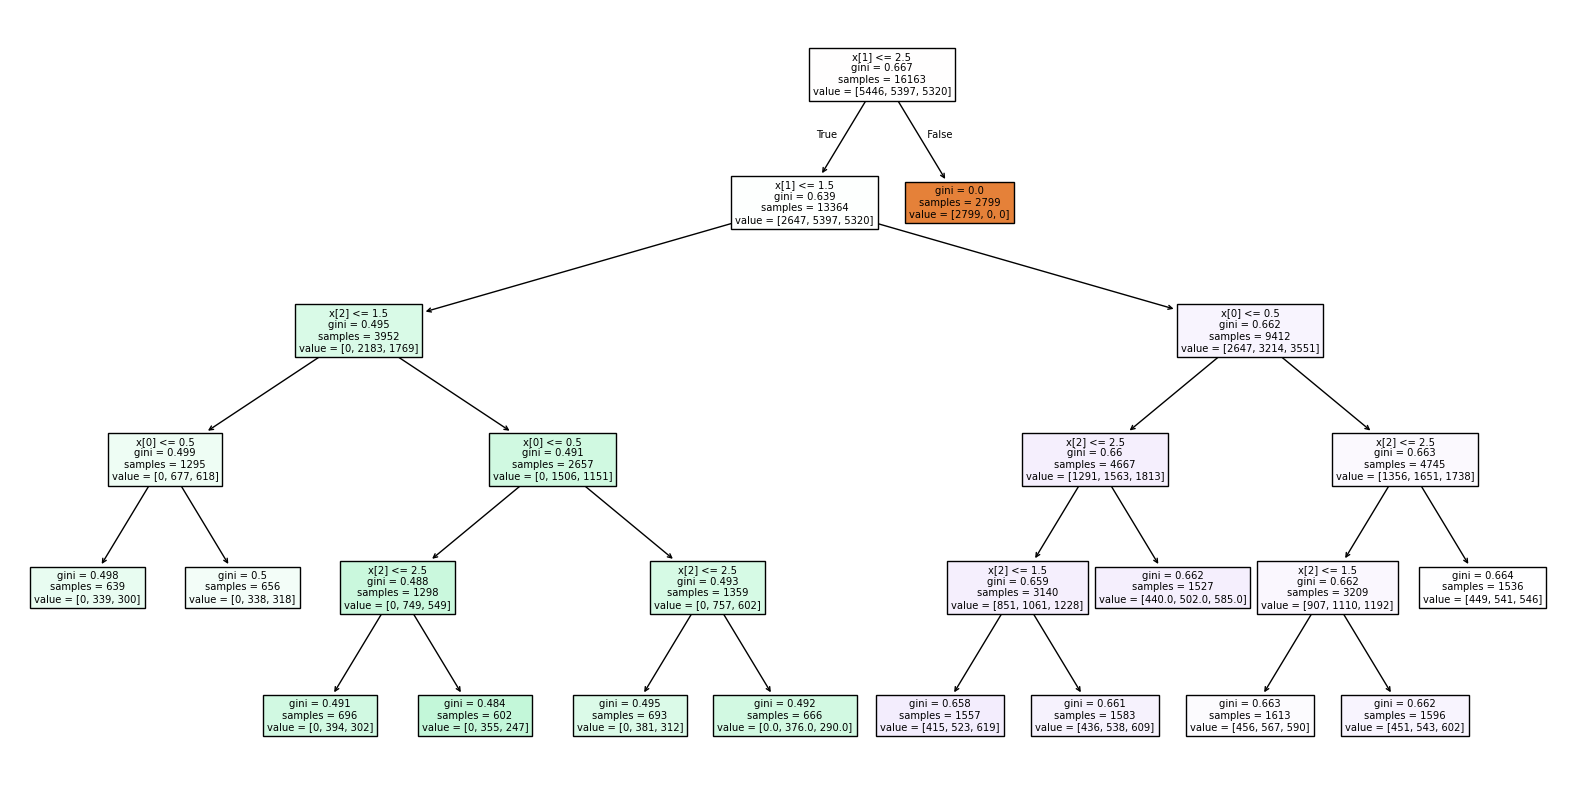

In [127]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True)
plt.show()

In [145]:
clf.predict([[1,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])